## Weekly trends plot for different years
* resampling frequency is 8 Days
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 8
pref = 'df_chl_dist_out_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_8D_modisa.csv


,time,id,temp,spd,vn,lat,var_tmp,var_lon,var_lat,ve,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,NaN,11.188906,6.509875,10.873656,1000.000000,0.000996,0.000352,-6.823625,...,-1.973699,-0.001366,-0.009464,0.015702,-0.104822,-0.009562,-0.066246,44,1,519.077549
260,2002-11-09,10206,NaN,3.428062,1.562844,11.155719,1000.000000,0.003551,0.000984,-0.786375,...,-2.015464,-0.000710,-0.005221,0.018147,-0.039686,-0.004973,-0.036544,45,2,544.277694
519,2002-11-17,10206,NaN,4.366719,0.728813,11.179438,1000.000000,0.002426,0.000691,-1.222031,...,-1.990017,0.000429,0.003181,0.022398,0.089287,0.003005,0.022266,46,3,553.600884
778,2002-11-25,10206,NaN,6.779344,2.751937,11.310312,1000.000000,0.003086,0.000877,-5.805906,...,-1.979629,0.000178,0.001298,0.021462,0.060390,0.001249,0.009089,48,5,568.418257
1037,2002-12-03,10206,NaN,15.720844,7.625781,11.619656,1000.000000,0.008155,0.001989,-13.705094,...,-1.863498,0.002126,0.014516,0.028727,0.263300,0.014882,0.101615,49,6,644.469466
1296,2002-12-11,10206,NaN,12.160375,6.657594,12.094781,1000.000000,0.005590,0.001419,-9.692125,...,-1.994254,-0.002377,-0.016344,0.011931,-0.210450,-0.016637,-0.114411,50,7,734.343511
1555,2002-12-19,10206,NaN,9.617437,4.556469,12.434812,1000.000000,0.004192,0.001140,-8.368125,...,-1.852240,0.002596,0.017752,0.030481,0.312967,0.018174,0.124262,51,8,796.212237
1814,2002-12-27,10206,NaN,12.251438,-1.765500,12.549094,1000.000000,0.001212,0.000417,-11.493313,...,-1.680627,0.003671,0.021452,0.034491,0.369764,0.025700,0.150161,52,9,865.389879
2073,2003-01-04,10206,NaN,12.856875,-5.715375,12.280437,1000.000000,0.002190,0.000691,-11.053437,...,-1.433772,0.006519,0.030857,0.045112,0.514147,0.045632,0.215998,1,11,938.950903


In [4]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
print(df_timed)

year_max 2016
year_min 2002
                  id       temp        spd         vn        lat      var_tmp  \
time                                                                            
2002-11-01     10206        NaN  11.188906   6.509875  10.873656  1000.000000   
2002-11-01     11089  28.969813  13.679406   4.337844  14.269219     0.003679   
2002-11-01     15707        NaN  24.892219  -9.856812  14.029656  1000.000000   
2002-11-01     34315  29.556844  40.707469 -21.698844   6.147375     0.004147   
2002-11-01     34710  28.970219  12.432687  11.684344  17.038563     0.001698   
2002-11-01     34721  29.461469  11.726781   1.577594  12.603531     0.001790   
2002-11-09     10206        NaN   3.428062   1.562844  11.155719  1000.000000   
2002-11-09     11089  28.742188  19.677781  -6.951906  14.220969     0.003868   
2002-11-09     15707        NaN  23.783812 -15.661781  12.926656  1000.000000   
2002-11-09     34315  29.258437  45.611312  40.049469   7.109875     0.003662   



 summary statistics of chl_rate_week for the year 2002 

count    47.000000
mean      0.012501
std       0.088254
min      -0.384863
25%      -0.008083
50%       0.004763
75%       0.036585
max       0.340719
Name: chl_rate_week, dtype: float64


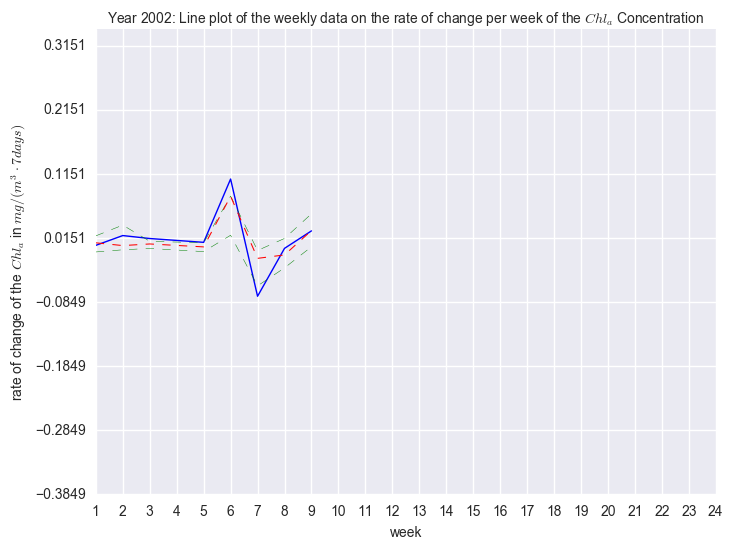

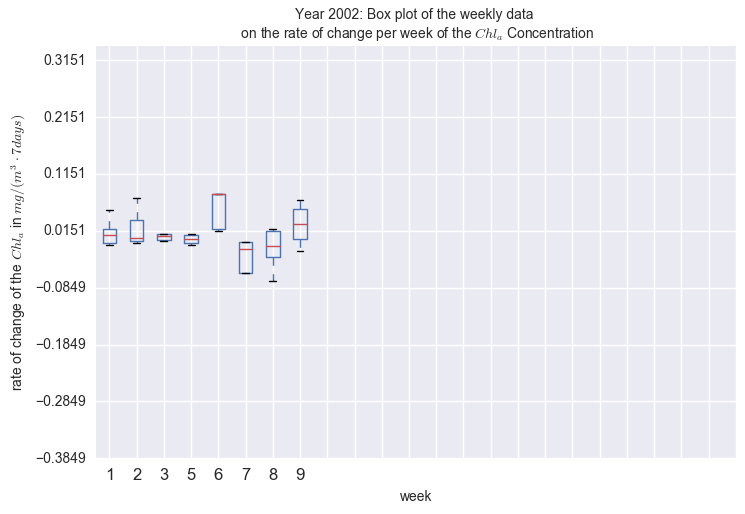


 summary statistics of chl_rate_week for the year 2003 

count    43.000000
mean     -0.007259
std       1.037591
min      -4.505888
25%      -0.085739
50%      -0.025629
75%       0.065194
max       3.946311
Name: chl_rate_week, dtype: float64


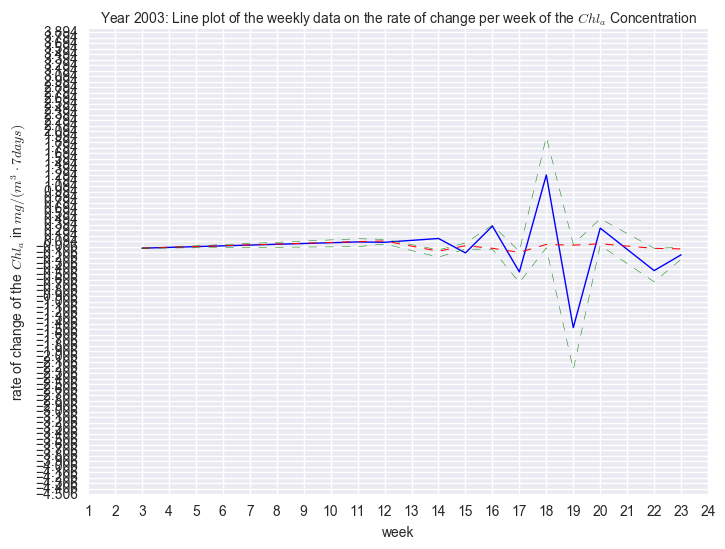

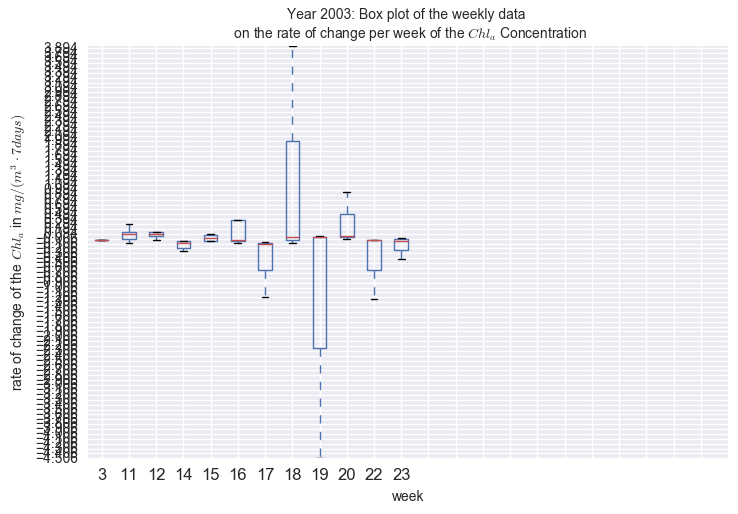


 summary statistics of chl_rate_week for the year 2004 

count    12.000000
mean      0.020308
std       0.052786
min      -0.036748
25%      -0.005716
50%       0.009208
75%       0.026089
max       0.163932
Name: chl_rate_week, dtype: float64


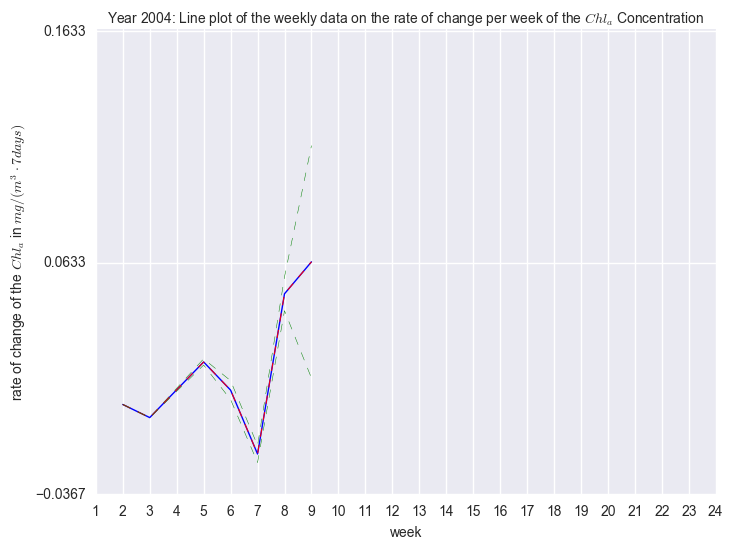

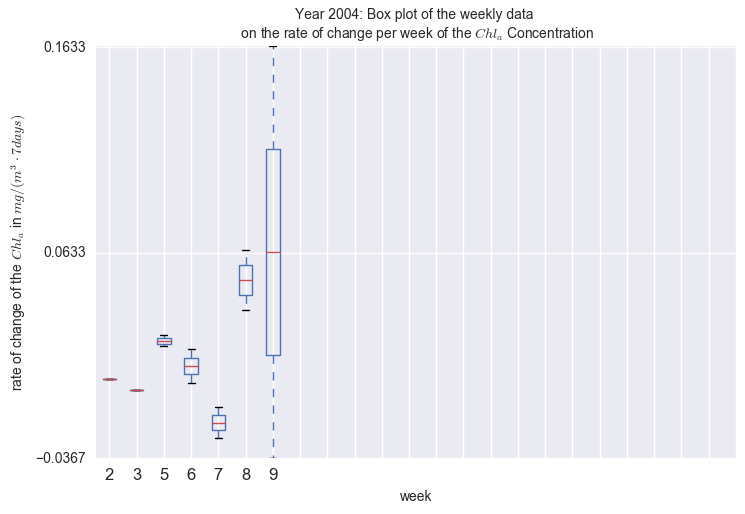


 summary statistics of chl_rate_week for the year 2005 

count    52.000000
mean     -0.000961
std       0.106657
min      -0.344804
25%      -0.012313
50%       0.009678
75%       0.042671
max       0.318852
Name: chl_rate_week, dtype: float64


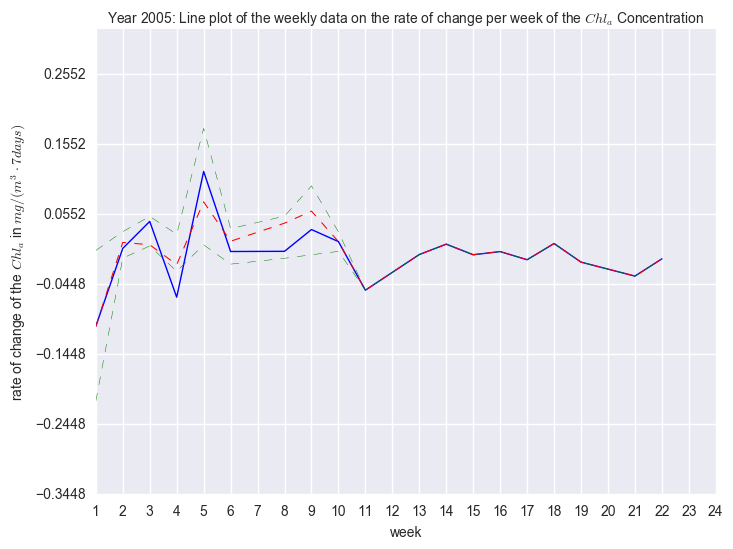

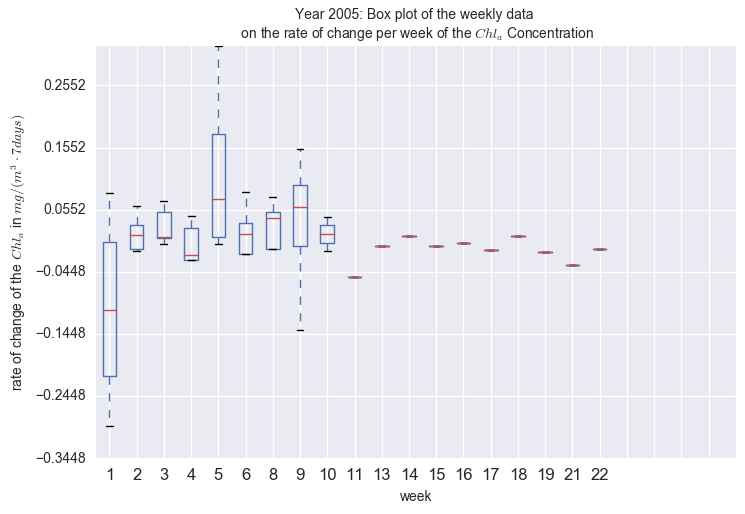


 summary statistics of chl_rate_week for the year 2006 

count    108.000000
mean      -0.004029
std        0.222574
min       -0.970261
25%       -0.040782
50%       -0.010139
75%        0.013529
max        1.117930
Name: chl_rate_week, dtype: float64


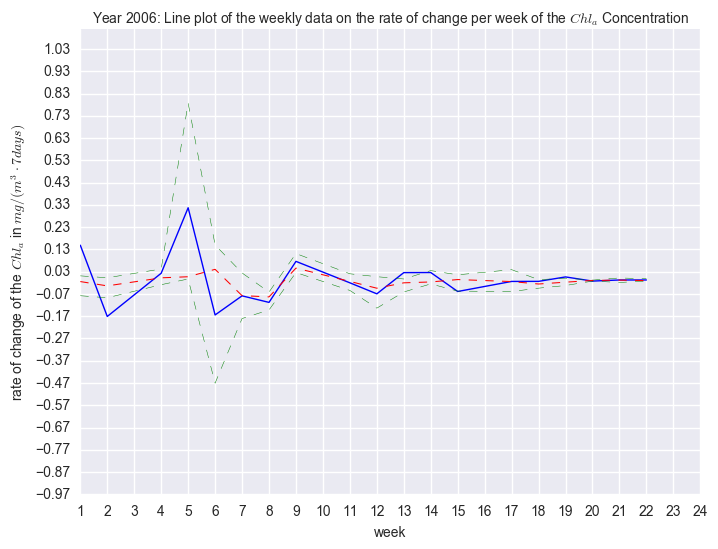

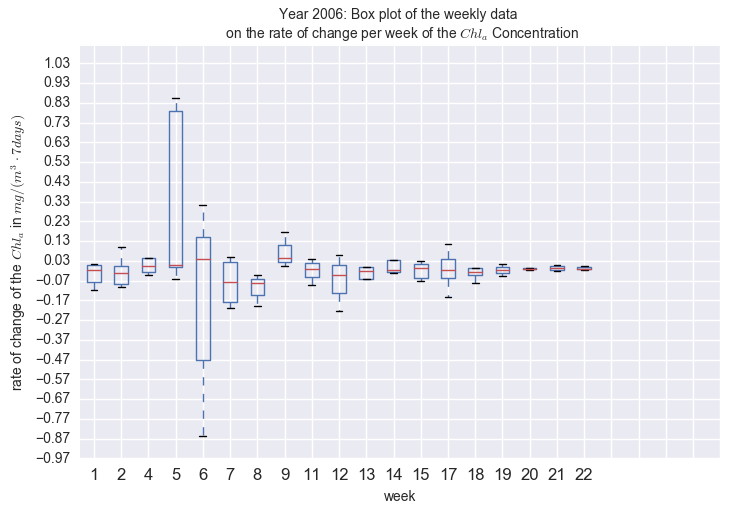


 summary statistics of chl_rate_week for the year 2007 

count    104.000000
mean       0.008155
std        0.098477
min       -0.235875
25%       -0.031448
50%        0.001176
75%        0.032303
max        0.608115
Name: chl_rate_week, dtype: float64


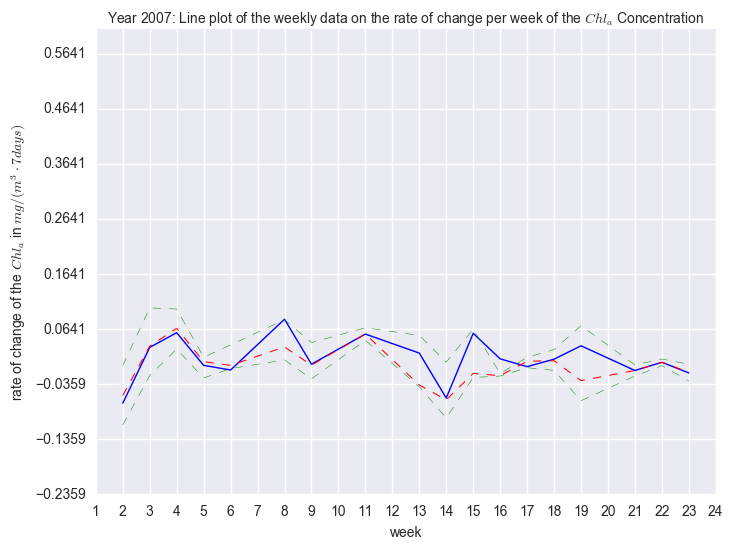

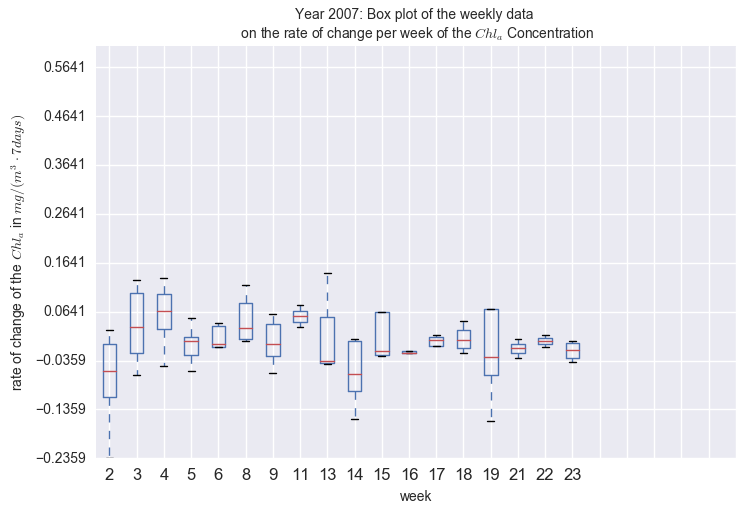


 summary statistics of chl_rate_week for the year 2008 

count    168.000000
mean      -0.329516
std        2.533692
min      -13.458564
25%       -0.029017
50%       -0.006184
75%        0.015337
max        9.437116
Name: chl_rate_week, dtype: float64


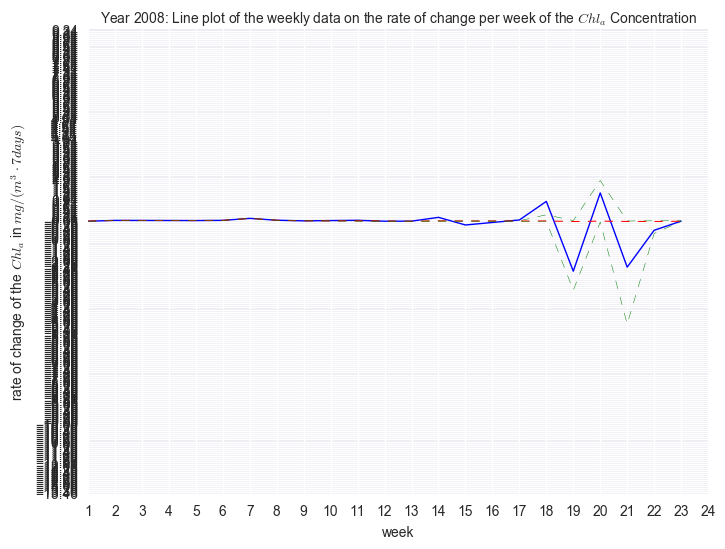

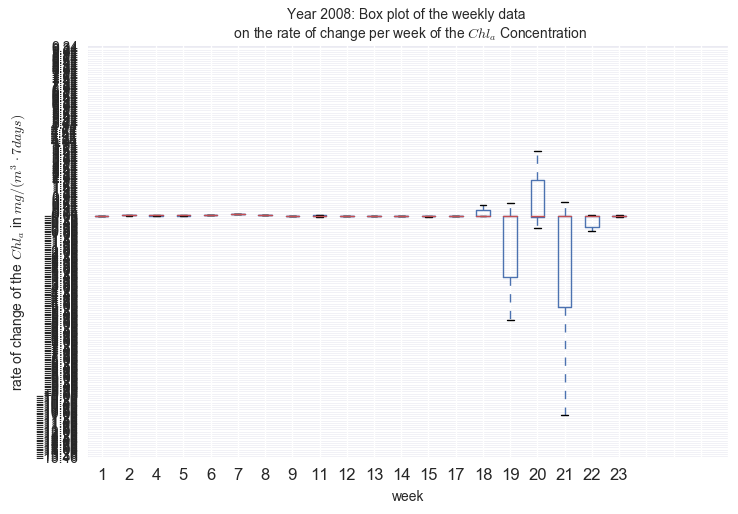


 summary statistics of chl_rate_week for the year 2009 

count    47.000000
mean     -0.070896
std       0.444824
min      -2.881282
25%      -0.017397
50%       0.004127
75%       0.020468
max       0.376065
Name: chl_rate_week, dtype: float64


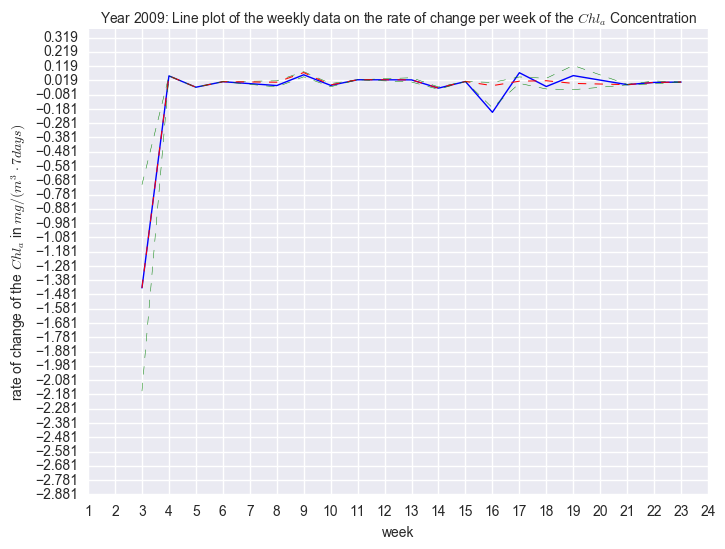

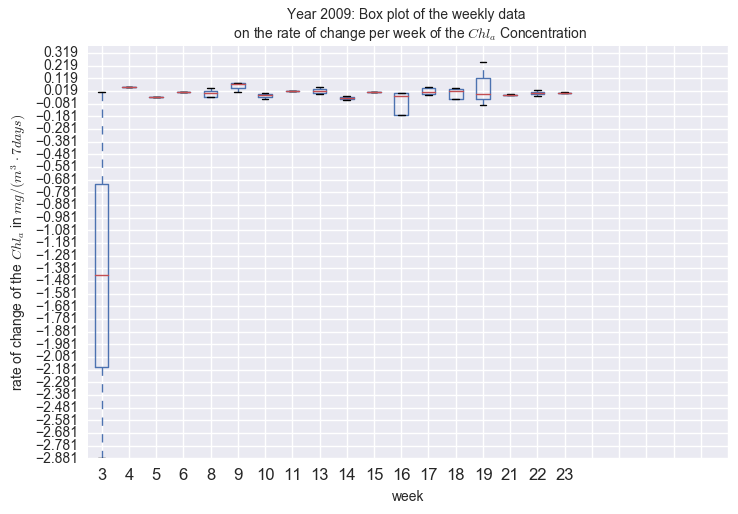


 summary statistics of chl_rate_week for the year 2010 

count    76.000000
mean     -0.008542
std       0.079811
min      -0.359767
25%      -0.035917
50%      -0.003699
75%       0.015474
max       0.299170
Name: chl_rate_week, dtype: float64


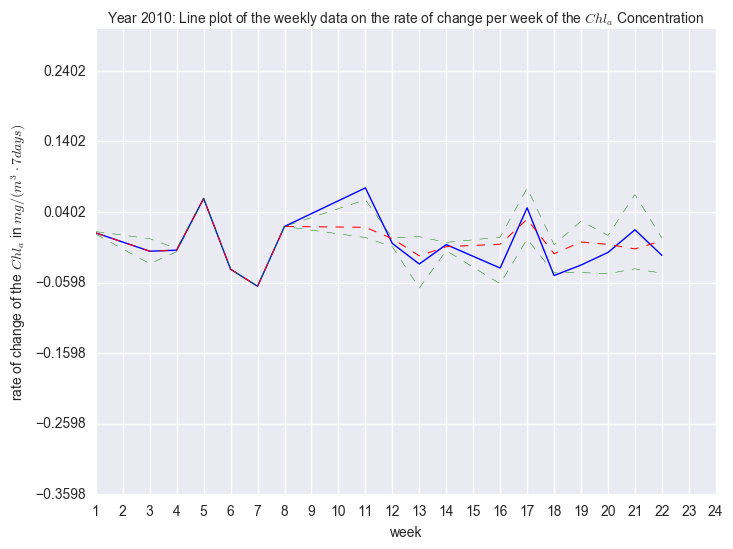

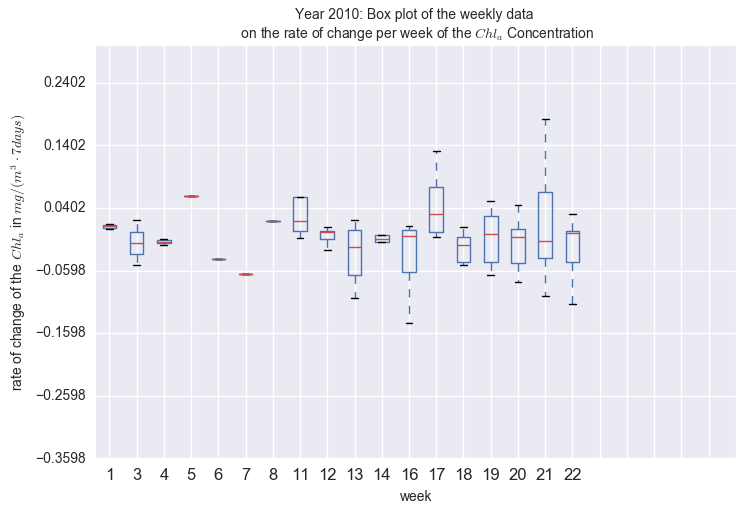


 summary statistics of chl_rate_week for the year 2011 

count    22.000000
mean      0.009969
std       0.155910
min      -0.605004
25%      -0.016517
50%       0.017768
75%       0.071683
max       0.269547
Name: chl_rate_week, dtype: float64


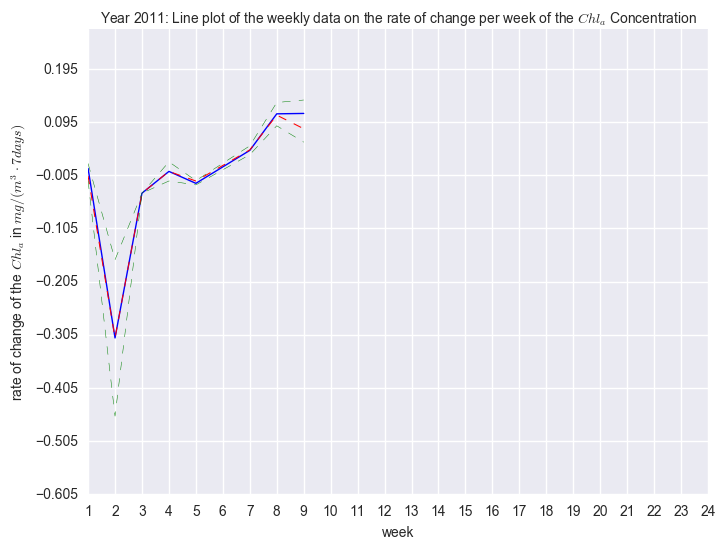

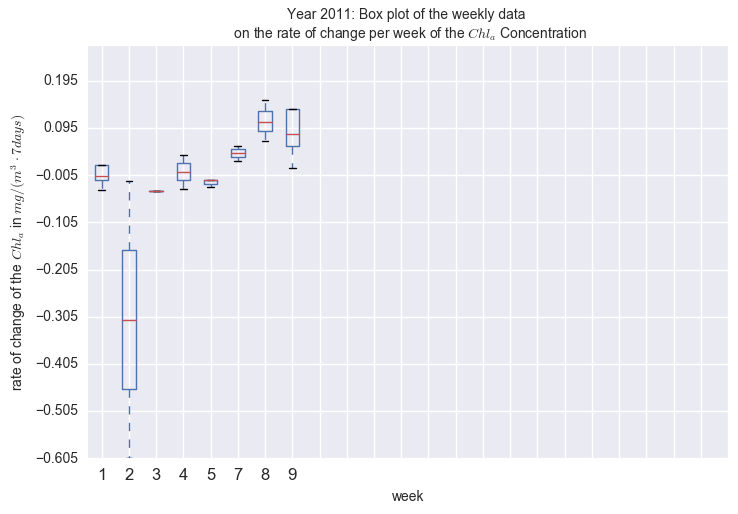


 summary statistics of chl_rate_week for the year 2012 

count    42.000000
mean      0.080302
std       0.713988
min      -1.258505
25%      -0.066414
50%      -0.007276
75%       0.080933
max       3.530189
Name: chl_rate_week, dtype: float64


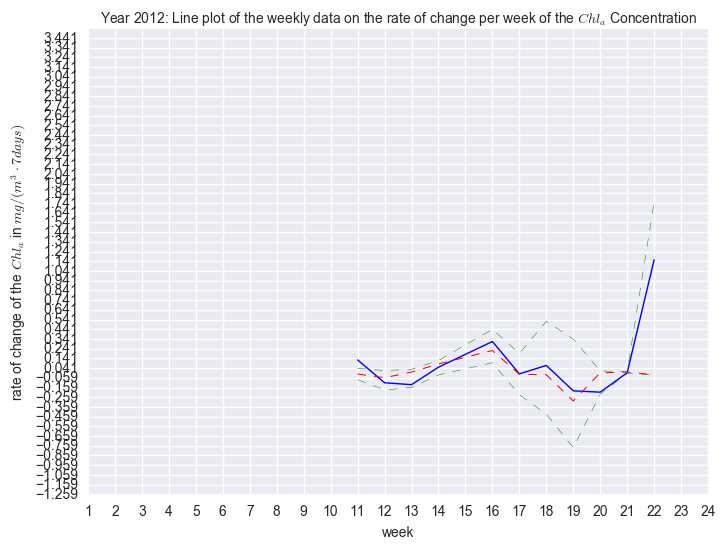

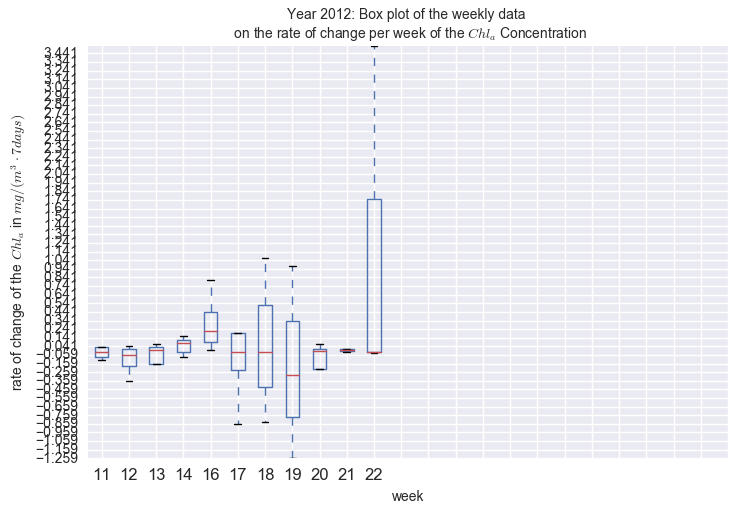


 summary statistics of chl_rate_week for the year 2013 

count    31.000000
mean      0.071552
std       0.357516
min      -0.158720
25%      -0.046784
50%       0.003959
75%       0.026170
max       1.910594
Name: chl_rate_week, dtype: float64


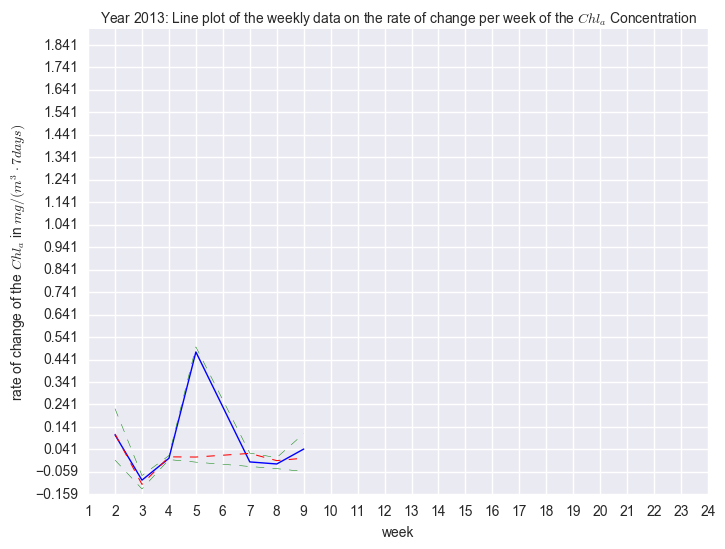

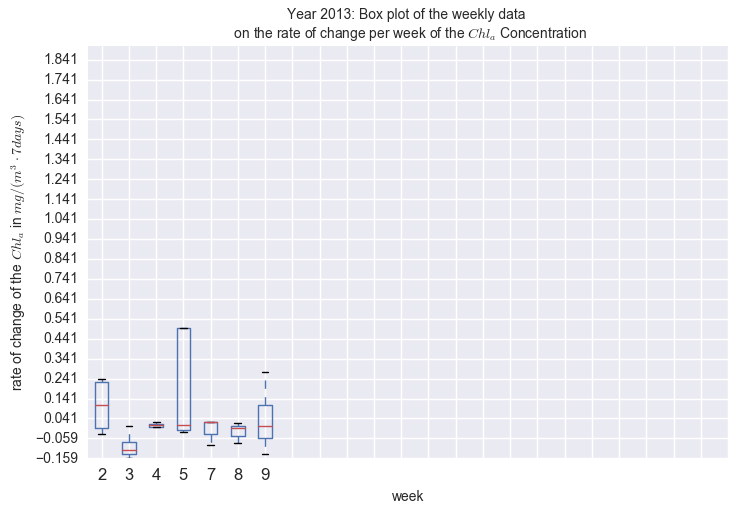


 summary statistics of chl_rate_week for the year 2014 

count    195.000000
mean       0.041783
std        2.217935
min      -19.407526
25%       -0.079109
50%       -0.008751
75%        0.073179
max       18.318641
Name: chl_rate_week, dtype: float64


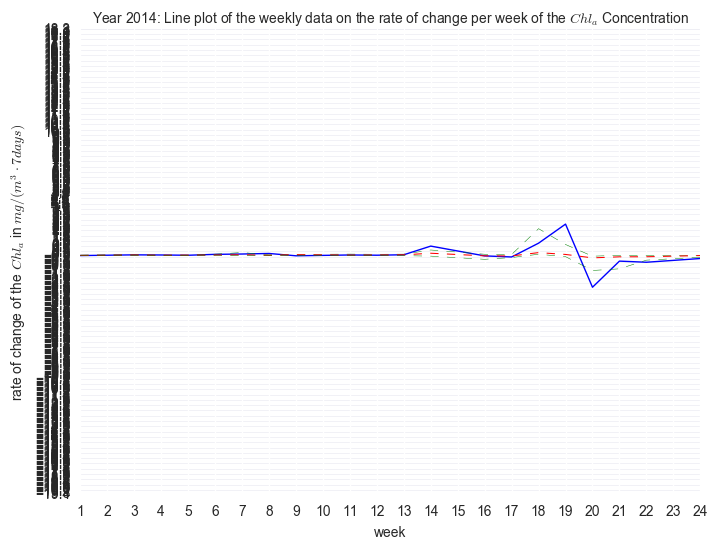

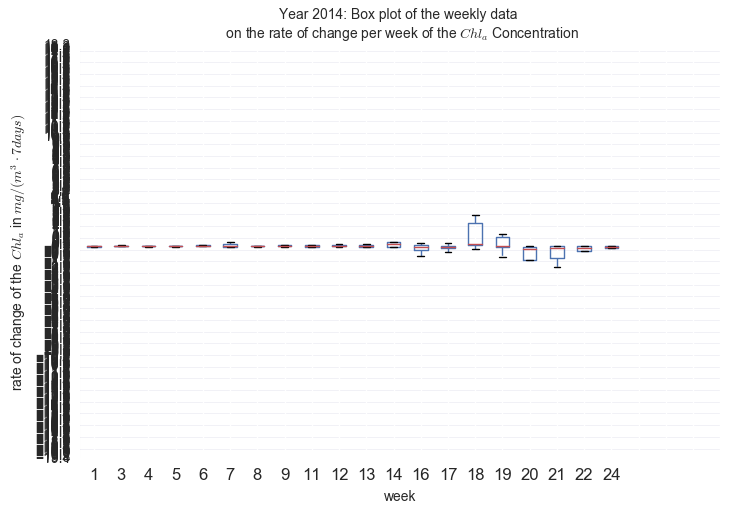


 summary statistics of chl_rate_week for the year 2015 

count    95.000000
mean      0.024597
std       4.251888
min     -30.385148
25%      -0.055458
50%       0.003393
75%       0.055819
max      24.773276
Name: chl_rate_week, dtype: float64


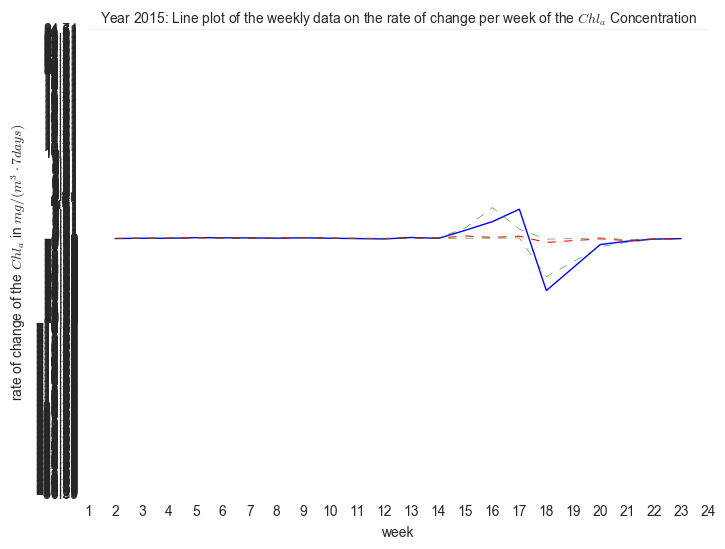

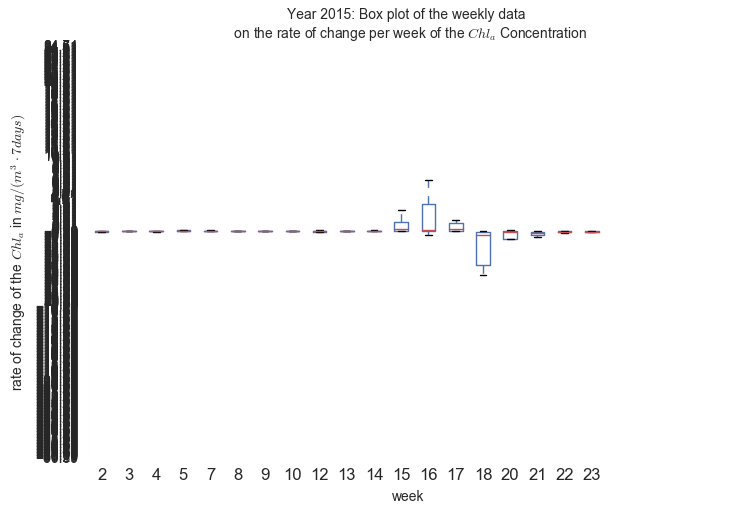


 summary statistics of chl_rate_week for the year 2016 

count    47.000000
mean     -0.007203
std       0.149510
min      -0.379908
25%      -0.025115
50%      -0.010103
75%       0.019803
max       0.709296
Name: chl_rate_week, dtype: float64


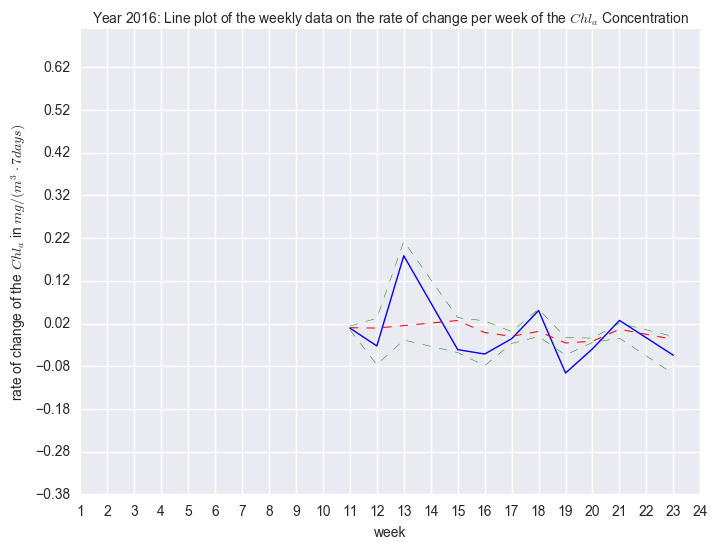

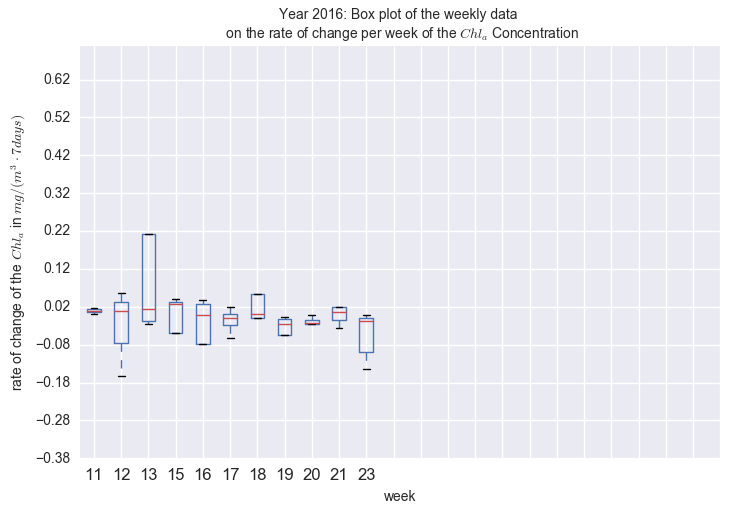

In [5]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(df_yearly.chl_rate_week.min(), df_yearly.chl_rate_week.max())
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(df_yearly.chl_rate_week.min(), df_yearly.chl_rate_week.max(), 0.1))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(df_yearly.chl_rate_week.min(), df_yearly.chl_rate_week.max())
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(df_yearly.chl_rate_week.min(), df_yearly.chl_rate_week.max(), 0.1))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()